# Difference in lines of constant latitude

Comparing differences between the real, and the flat Earth model

In [1]:
import numpy as np
import sympy as sp

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

### Just some matplotlib and seaborn parameter tuning

In [2]:
out = 'out\\'
figsave_format = 'png'
figsave_dpi = 200

axislabelsize = 18
axisticksize = 20
axislegendsize = 18
figcaptionsize = 14

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

# Seaborn style settings
seaborn_cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

## Flat Earth vs Real model

[//]: # (Banish \phi from this realm)
$$
\renewcommand{\phi}{\varphi}
$$
The general form of the **meridian radius of curvature** can be shown to be equal to

$$
\begin{equation*}
M \left( \phi \right)
=
\frac{a \left( 1 - e^{2} \right)}{\left( 1 - e^{2} \sin^{2} \left( \phi \right) \right)^{\frac{3}{2}}}
\label{eq:1} \tag{1}
\end{equation*}
$$

It can be also shown, that the **meridian distance** from the equator to latitude $\phi$ is

$$
\begin{equation*}
m \left( \phi \right)
=
\int_{0}^{\phi} M \left( \phi \right)\,\text{d}\phi
=
a \left( 1 - e^{2} \right)
\int_{0}^{\phi}
\frac{1}{\left( 1 - e^{2} \sin^{2} \left( \phi \right) \right)^{\frac{3}{2}}}\,\text{d}\phi
\label{eq:2} \tag{2}
\end{equation*}
$$

Using the parametric latitude, this formula could be written in a much easier form as follows:

$$
\begin{equation*}
m \left( \phi \right)
=
b
\int_{0}^{\beta}
\sqrt{1 + e'^{2} \sin^{2} \left( \beta \right)}\,\text{d}\beta
\label{eq:3} \tag{3}
\end{equation*}
$$

where $b = a \sqrt{1 - e^{2}}$ is the length of the semi-minor axis. In the form seen in equation \eqref{eq:2} the integral in the formula of the $m \left( \phi \right)$ meridian distance is an incoplete elliptic integral of the third kind, which could be written in terms of incomplete elliptic integral of the second kind (equation \eqref{eq:3}) as seen in the NIST (see https://dlmf.nist.gov/19.6#iv). The formulation is the following:

$$
\begin{equation*}
m \left( \phi \right)
=
b E \left( \beta, i e' \right)
\label{eq:4} \tag{4}
\end{equation*}
$$

Where $E \left( \beta, i e' \right)$ is an incomplete elliptic integrals of the second kind.

In [3]:
from sympy.functions.special.elliptic_integrals import elliptic_e

### 1. Approximating Earth to be completely spherical

In [4]:
## Constants

# Using the euqatorial radius as semi-major axis, defined by the WGS84 geodetic system
# Source: https://www.wmo.int/pages/prog/sat/meetings/documents/ET-SAT-6_Doc_16-01_WGS84.pdf
# [a] = km
a = 6378.1370

# Approximating Earth to be a sphere with zero eccentricity
e = 0
# Parametric eccentricity
e_par = e**2 / (1 - e**2)

# Calculating semi-minor axis length
b = a * np.sqrt(1 - e**2)

In [5]:
# Sampling points for \phi latitudes
# [phi] = rad
# Southern pole is at -pi/2 rad
# Nothern pole is at +pi/2 rad
phi = np.linspace(-np.pi/2, np.pi/2, 181)

# Calculating parametric latitudes for easier calculations
beta_phi = np.arctan(np.sqrt(1 - e**2) * np.tan(phi))

In [6]:
# Calculating the m(\phi) meridian distances from the equator to a pole
m_phi = np.array([b * float(elliptic_e(m, 1j*e_par)) for m in beta_phi])

# Calculating the M(\phi) meridian radiuses from the equator to a pole
M_phi = a * (1 - e**2) / (1 - e**2 * np.sin(phi)**2)**(3/2)

In [7]:
# Calculating distances between 1° latitudes
lat_dist = np.zeros(len(m_phi) - 1)
for i in range(len(m_phi[:-1])):
    lat_dist[i] = m_phi[i+1] - m_phi[i]

We need to find the perimeter of the small circle, at the given altitude $\phi$, which will be the length of the longitude at 

In [8]:
def plot_latitude_sphere(flat=False):
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*8))

    deg_x = np.linspace(-90, 90, 180)
    axes.plot(deg_x, lat_dist,
              color='tab:blue', lw=3)

    # Adding caption to the figure
    caption = 'Fig. 1. Distance between 1° latitudes on a completely spherical Earth'
    plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=figcaptionsize)

    axes.set_xlabel('Arc distance along meridians from equator [deg]', fontsize=axislabelsize, fontweight='bold')
    axes.set_ylabel('Arc distance between $\\mathbf{1^{\circ}}$ latitudes [km]', fontsize=axislabelsize, fontweight='bold')
    axes.tick_params(axis='both', which='major', labelsize=axisticksize)

    axes.set_xlim(np.min(deg_x), np.max(deg_x))
    axes.set_ylim(np.min(lat_dist)-2, np.max(lat_dist)+2)

    deg_x_ticks = np.linspace(-90, 90, 181)[::15]
    axes.set_xticks(deg_x_ticks)
    axes.set_xticklabels(['{0:.0f}'.format(x) for x in deg_x_ticks])

    if flat:
        file_name = 'fig1_latitude_sphere_w_flat'
    else:
        file_name = 'fig1_latitude_sphere'
    plt.savefig('./out/{}.'.format(file_name) + figsave_format,
                format=figsave_format,
                dpi=figsave_dpi,
                bbox_inches='tight')

    plt.show()

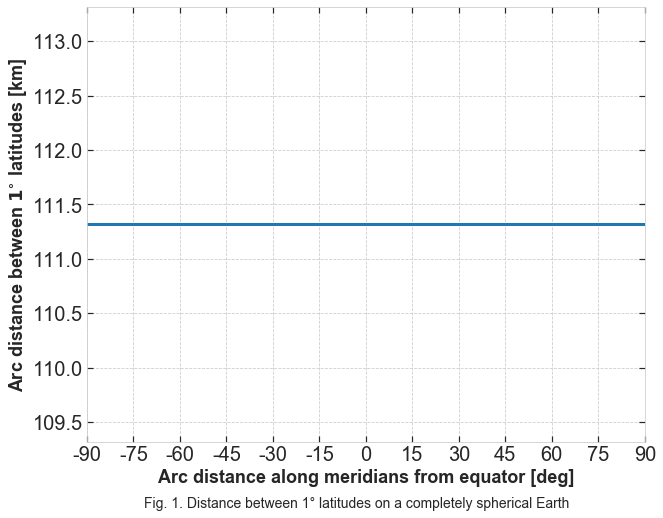

In [9]:
plot_latitude_sphere(flat=False)

#### Distance between 1° longitudes

In [10]:
# Calculating distances between 1° longitudes
long_dist = np.pi * M_phi * np.cos(phi) / (180 * np.sqrt(1 - e**2 * np.sin(phi)**2))

In [11]:
def plot_longitude_sphere(flat=False):
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*8))

    deg_x = np.linspace(-90, 90, 181)
    axes.plot(deg_x, long_dist,
              color='tab:blue', lw=3)

    # Adding caption to the figure
    caption = 'Fig. 2. Distance between 1° longitudes on a sphere Earth'
    plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=figcaptionsize)

    axes.set_xlabel('Arc distance along meridians from equator [deg]', fontsize=axislabelsize, fontweight='bold')
    axes.set_ylabel('Arc distance between $\\mathbf{1^{\circ}}$ longitudes [km]', fontsize=axislabelsize, fontweight='bold')
    axes.tick_params(axis='both', which='major', labelsize=axisticksize)

    axes.set_xlim(np.min(deg_x), np.max(deg_x))

    deg_x_ticks = np.linspace(-90, 90, 181)[::15]
    axes.set_xticks(deg_x_ticks)
    axes.set_xticklabels(['{0:.0f}'.format(x) for x in deg_x_ticks])


    if flat:
        file_name = 'fig2_longitude_sphere_w_flat'
    else:
        file_name = 'fig2_longitude_sphere'
    plt.savefig('./out/{}.'.format(file_name) + figsave_format,
                format=figsave_format,
                dpi=figsave_dpi,
                bbox_inches='tight')

    plt.show()

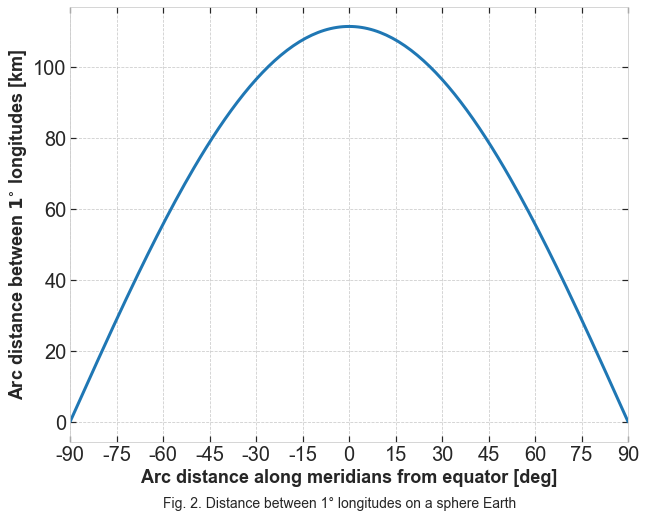

In [12]:
plot_longitude_sphere(flat=False)

### 2. Approximating Earth to be oblate spheroid

In [13]:
## Constants

# Using the equatorial radius as semi-major axis, defined by the WGS84 geodetic system
# Source: https://www.wmo.int/pages/prog/sat/meetings/documents/ET-SAT-6_Doc_16-01_WGS84.pdf
# [a] = km
a = 6378.1370

# Approximating Earth to be an oblate spheroid
f = 1/298.257223563
e = np.sqrt(2*f - f**2)
# Parametric eccentricity
e_par = np.sqrt(e**2 / (1 - e**2))

# Calculating semi-minor axis length
b = a * np.sqrt(1 - e**2)

In [14]:
# Sampling points for \phi latitudes
# [phi] = rad
# Southern pole is at -pi/2 rad
# Nothern pole is at +pi/2 rad
phi = np.linspace(-np.pi/2, np.pi/2, 181)

# Calculating parametric latitudes for easier calculations
beta_phi = np.arctan(np.sqrt(1 - e**2) * np.tan(phi))

In [15]:
# Calculating the m(\phi) meridian distances from the equator to a pole
m_phi = np.array([b * elliptic_e(m, (1j*e_par)**2) for m in beta_phi])

# Calculating the M(\phi) meridian radiuses from the equator to a pole
M_phi = a * (1 - e**2) / (1 - e**2 * np.sin(phi)**2)**(3/2)

#### Distance between 1° latitudes

In [16]:
# Calculating distances between 1° latitudes
lat_dist = np.zeros(len(m_phi) - 1)
for i in range(len(m_phi[:-1])):
    lat_dist[i] = m_phi[i+1] - m_phi[i]

In [17]:
# Calculating distances between 1° latitudes on flat Earth
lat_dist_flat = np.array([(m_phi[-1] - m_phi[0])/180 for i in range(len(m_phi[:-1]))])

In [18]:
def plot_latitude_spheroid(flat=False):
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*8))

    deg_x = np.linspace(-90, 90, 180)
    axes.plot(deg_x, lat_dist, label='Oblate spheroid',
              color='tab:blue', lw=3)
    if flat:
        axes.plot(deg_x, lat_dist_flat, label='Flat',
                  color='tab:red', lw=3, ls='--')

    # Adding caption to the figure
    caption = 'Fig. 3. Distance between 1° latitudes on an oblete spheroid Earth'
    plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=figcaptionsize)

    axes.set_xlabel('Arc distance along meridians from equator [deg]', fontsize=axislabelsize, fontweight='bold')
    axes.set_ylabel('Arc distance between $\\mathbf{1^{\circ}}$ latitudes [km]', fontsize=axislabelsize, fontweight='bold')
    axes.tick_params(axis='both', which='major', labelsize=axisticksize)

    axes.set_xlim(np.min(deg_x), np.max(deg_x))

    deg_x_ticks = np.linspace(-90, 90, 181)[::15]
    axes.set_xticks(deg_x_ticks)
    axes.set_xticklabels(['{0:.0f}'.format(x) for x in deg_x_ticks])

    axes.legend(loc='lower right', fontsize=axislegendsize)
    
    if flat:
        file_name = 'fig3_latitude_spheroid_w_flat'
    else:
        file_name = 'fig3_latitude_spheroid'
    plt.savefig('./out/{}.'.format(file_name) + figsave_format,
                format=figsave_format,
                dpi=figsave_dpi,
                bbox_inches='tight')

    plt.show()

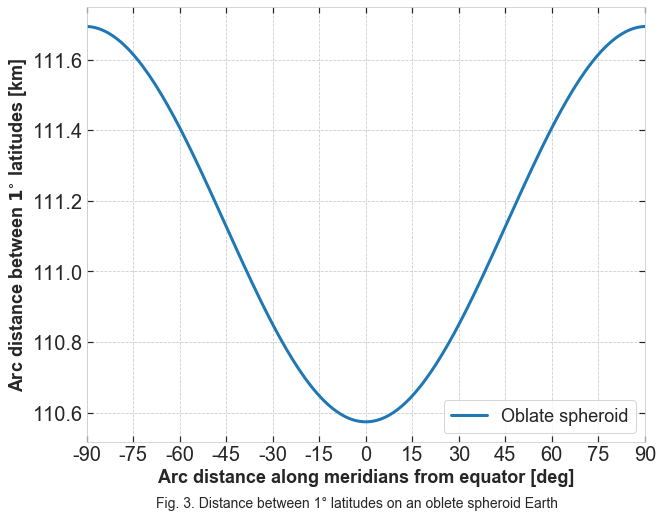

In [19]:
plot_latitude_spheroid(flat=False)

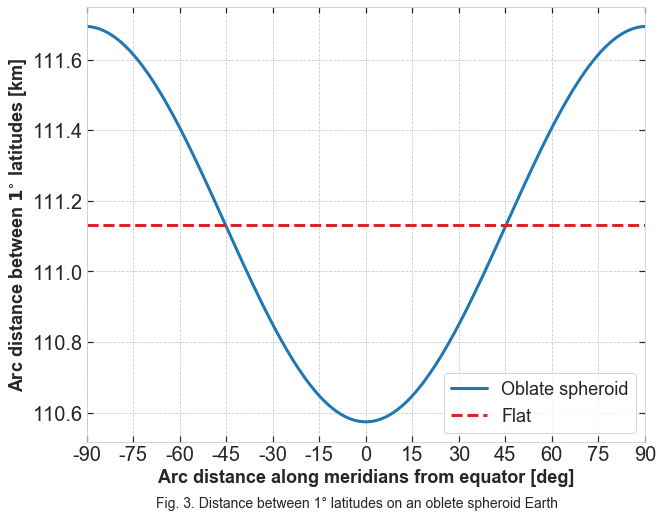

In [20]:
plot_latitude_spheroid(flat=True)

#### Distance between 1° longitudes

In [21]:
# Calculating distances between 1° longitudes
long_dist = np.pi * M_phi * np.cos(phi) / (180 * np.sqrt(1 - e**2 * np.sin(phi)**2))

In [22]:
def plot_longitude_spheroid(flat=False):
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*8))

    deg_x = np.linspace(-90, 90, 181)
    axes.plot(deg_x, long_dist, label='Oblate spheroid',
              color='tab:blue', lw=3)
    if flat:
        axes.plot(deg_x, (m_phi + np.max(m_phi)) * np.pi / 180, label='Flat',
                  color='tab:red', lw=3, ls='--')

    # Adding caption to the figure
    caption = 'Fig. 4. Distance between 1° longitudes on an oblete spheroid Earth'
    plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=figcaptionsize)

    axes.set_xlabel('Arc distance along meridians from equator [deg]', fontsize=axislabelsize, fontweight='bold')
    axes.set_ylabel('Arc distance between $\\mathbf{1^{\circ}}$ longitudes [km]', fontsize=axislabelsize, fontweight='bold')
    axes.tick_params(axis='both', which='major', labelsize=axisticksize)

    axes.set_xlim(np.min(deg_x), np.max(deg_x))

    deg_x_ticks = np.linspace(-90, 90, 181)[::15]
    axes.set_xticks(deg_x_ticks)
    axes.set_xticklabels(['{0:.0f}'.format(x) for x in deg_x_ticks])

    axes.legend(loc='upper left', fontsize=axislegendsize)
    
    if flat:
        file_name = 'fig4_longitude_spheroid_w_flat'
    else:
        file_name = 'fig4_longitude_spheroid'
    plt.savefig('./out/{}.'.format(file_name) + figsave_format,
                format=figsave_format,
                dpi=figsave_dpi,
                bbox_inches='tight')

    plt.show()

Without flat Earth

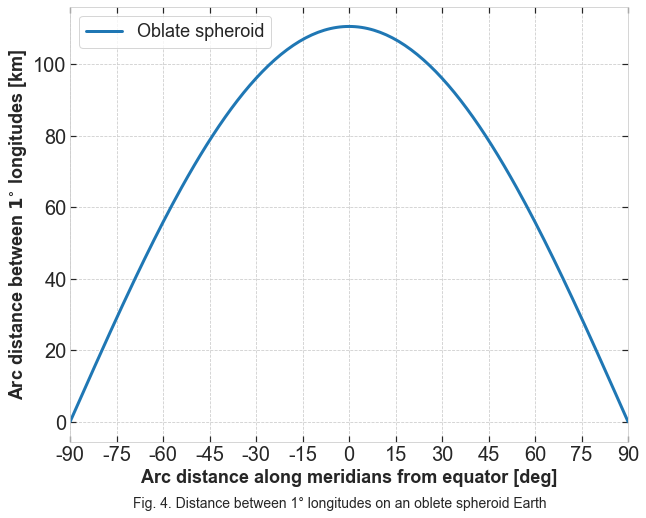

In [23]:
plot_longitude_spheroid(flat=False)

With flat Earth

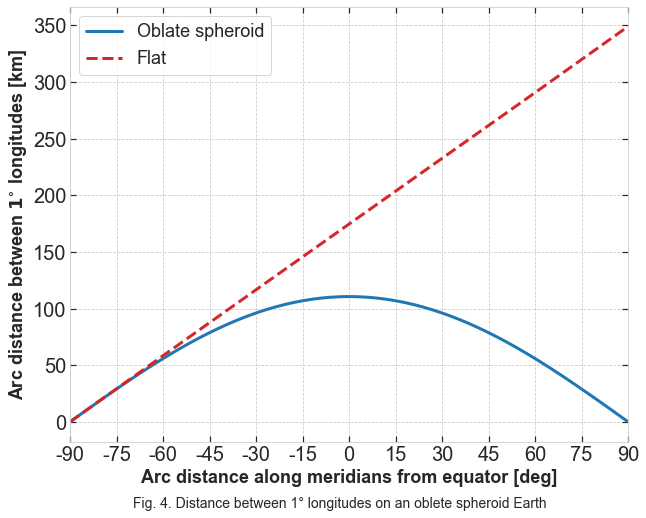

In [24]:
plot_longitude_spheroid(flat=True)